# Fuel Data Analysis Exploring and Visuals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

(array([[<AxesSubplot:title={'center':'greenhouse_gas_score'}>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'greenhouse_gas_score'}>]],
       dtype=object))

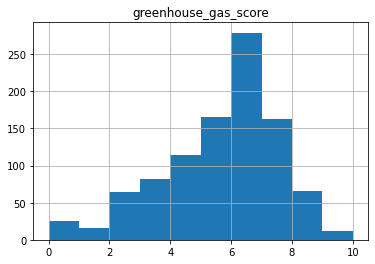

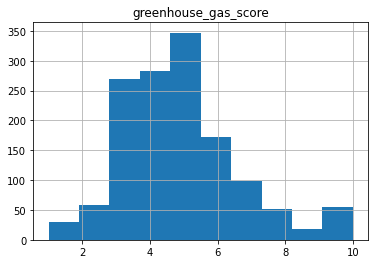

In [4]:
# Compare the distributions of greenhouse gas score in 2008 and 2018.
df_08.hist('greenhouse_gas_score'), df_18.hist('greenhouse_gas_score')

(array([[<AxesSubplot:title={'center':'cmb_mpg'}>]], dtype=object),
 array([[<AxesSubplot:title={'center':'cmb_mpg'}>]], dtype=object))

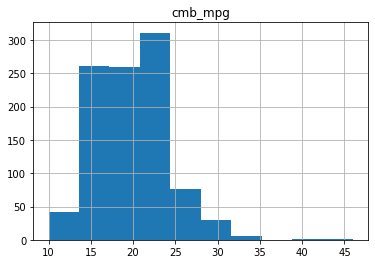

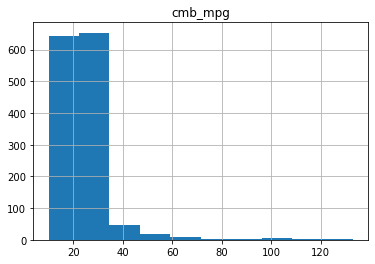

In [7]:
# How has the distribution of combined mpg changed from 2008 to 2018?
df_08.hist('cmb_mpg'), df_18.hist('cmb_mpg')

<AxesSubplot:xlabel='cmb_mpg', ylabel='displ'>

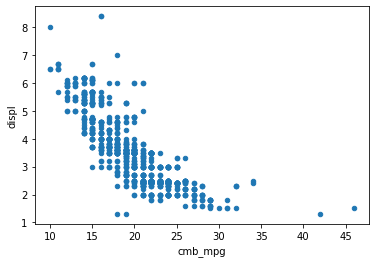

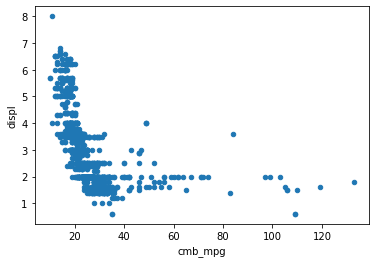

In [10]:
# Describe the correlation between displacement and combined mpg.
df_08.plot(kind = 'scatter', y = 'displ', x = 'cmb_mpg'),
df_18.plot(kind = 'scatter', y = 'displ', x = 'cmb_mpg')

<AxesSubplot:xlabel='greenhouse_gas_score', ylabel='cmb_mpg'>

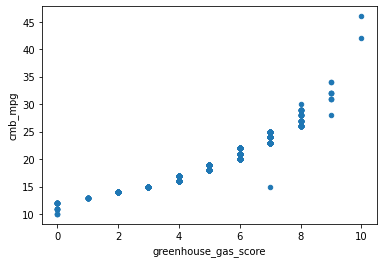

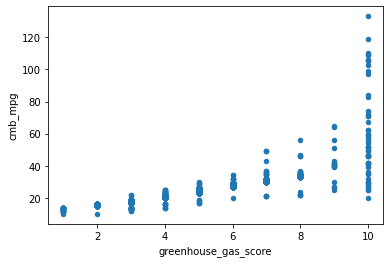

In [13]:
# Describe the correlation between greenhouse gas score and combined mpg.
df_08.plot(kind = 'scatter', x = 'greenhouse_gas_score', y = 'cmb_mpg'),
df_18.plot(kind = 'scatter', x = 'greenhouse_gas_score', y = 'cmb_mpg')

# Drawing Conclusions

### Q1: Are more unique models using alternative sources of fuel in 2018 compared to 2008? By how much?

In [14]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [15]:
df_18.fuel.value_counts()

Gasoline       1229
Ethanol          41
Gas              41
Diesel           37
Electricity      35
Name: fuel, dtype: int64

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity.

In [32]:
# how many unique models used alternative sources of fuel in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [33]:
# how many unique models used alternative sources of fuel in 2018
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

52

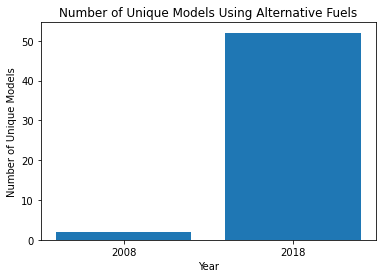

In [35]:
plt.bar(['2008', '2018'], [alt_08,alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2008, the number of unique models using alternative sources of fuel increased by 50. We can also look at proportions.

In [36]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 616)

In [37]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.08441558441558442)

Text(0, 0.5, 'Proportions of Unique Models')

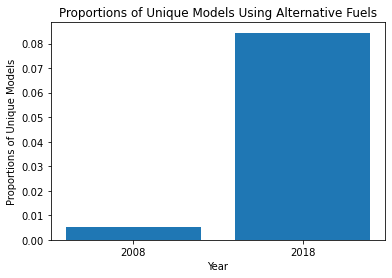

In [38]:
plt.bar(['2008', '2018'], [prop_08,prop_18])
plt.title("Proportions of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportions of Unique Models")

### Q2: How much have vehicle classes improved in fuel economy?

In [39]:
# Average fuel economy for each vehicle in 2008
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [40]:
# Average fuel economy for each vehicle in 2018
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          24.431507
midsize car        30.169725
minivan            27.166667
pickup             18.250000
small SUV          24.333333
small car          25.673759
special purpose    19.705882
standard SUV       19.405405
station wagon      30.054545
van                16.000000
Name: cmb_mpg, dtype: float64

In [41]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          5.922416
midsize car        8.568275
minivan            8.049020
pickup             1.972892
small SUV               NaN
small car          4.568654
special purpose         NaN
standard SUV            NaN
station wagon      7.687879
van                1.047619
Name: cmb_mpg, dtype: float64

In [43]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
inc

veh_class
large car        5.922416
midsize car      8.568275
minivan          8.049020
pickup           1.972892
small car        4.568654
station wagon    7.687879
van              1.047619
Name: cmb_mpg, dtype: float64

Text(0, 0.5, 'Increase in Average Combined MPG')

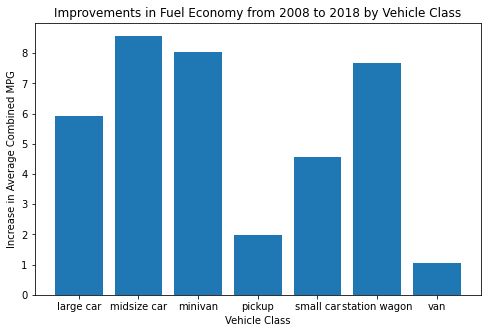

In [47]:
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG')

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [48]:
# We can analyze this by filtering each dataframe by SmartWay classification and exploring these datasets
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [49]:
smart_08 = df_08.query('smartway == "yes"')
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [51]:
# to the same to 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [52]:
smart_18 = df_18.query('smartway in ["yes", "Elite"]')
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,1.802174,3.913043,7.043478,62.956522,60.326087,61.565217,10.0
std,0.578692,0.724985,0.206185,31.710466,26.749915,29.283786,0.0
min,0.600000,2.000000,7.000000,25.000000,26.000000,25.000000,10.0
25%,1.600000,4.000000,7.000000,39.250000,41.250000,40.500000,10.0
50%,1.900000,4.000000,7.000000,53.500000,52.500000,52.000000,10.0
75%,2.000000,4.000000,7.000000,80.250000,77.250000,80.750000,10.0
max,3.600000,6.000000,8.000000,145.000000,121.000000,133.000000,10.0


In [54]:
smart_inc = smart_18.mean() - smart_08.mean()
smart_inc

C:\Users\20106\AppData\Local\Temp\ipykernel_12544\1734809316.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  smart_inc = smart_18.mean() - smart_08.mean()


displ                   -0.800721
cyl                     -0.913272
air_pollution_score     -0.322311
city_mpg                41.972311
hwy_mpg                 31.912929
cmb_mpg                 37.828375
greenhouse_gas_score     3.131579
dtype: float64

Text(0, 0.5, 'Difference in Average')

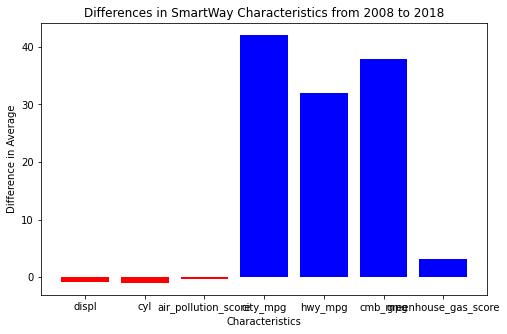

In [57]:
plt.subplots(figsize=(8, 5))
plt.bar(smart_inc.index, smart_inc, color = (smart_inc > 0).map({True: 'b',
                                                    False: 'r'}))
plt.title('Differences in SmartWay Characteristics from 2008 to 2018')
plt.xlabel('Characteristics')
plt.ylabel('Difference in Average')

### Q4: What features are associated with better fuel economy?

In [64]:
# There is 2 ways to do that
# First, you can do the same as previous questions
# Second, you can segregate the top 50% of the data by cmb mpg
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [65]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,1.985428,4.094718,4.934426,29.675774,36.641166,32.284153,6.526412
std,0.496196,0.635154,1.884260,15.196900,12.290901,13.816292,1.560733
min,0.600000,2.000000,1.000000,21.000000,26.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,29.000000,37.000000,32.000000,7.000000
max,4.000000,8.000000,8.000000,145.000000,121.000000,133.000000,10.000000


In [66]:
top_inc = top_18.mean() - top_08.mean()
top_inc

C:\Users\20106\AppData\Local\Temp\ipykernel_12544\2211442058.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_inc = top_18.mean() - top_08.mean()


displ                  -0.682395
cyl                    -0.795456
air_pollution_score    -2.063647
city_mpg                9.357855
hwy_mpg                 9.038083
cmb_mpg                 9.291860
greenhouse_gas_score   -0.113280
dtype: float64

Text(0, 0.5, 'Difference in Average')

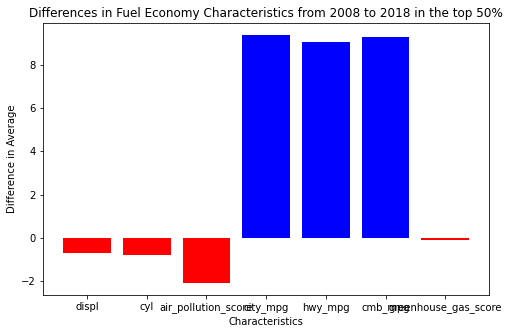

In [67]:
plt.subplots(figsize=(8, 5))
plt.bar(top_inc.index, top_inc, color = (top_inc > 0).map({True: 'b',
                                                    False: 'r'}))
plt.title('Differences in Fuel Economy Characteristics from 2008 to 2018')
plt.xlabel('Characteristics')
plt.ylabel('Difference in Average')

### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?

In [94]:
model_08 = df_08.model.unique()
model_08

array(['ACURA MDX', 'ACURA RDX', 'ACURA RL', 'ACURA TL', 'ACURA TSX',
       'ASTON MARTIN DB9', 'ASTON MARTIN DB9 Volante',
       'ASTON MARTIN V8 Vantage', 'AUDI A3', 'AUDI A4', 'AUDI A4 Avant',
       'AUDI A4 Cabriolet', 'AUDI A6', 'AUDI A6 Avant', 'AUDI A8',
       'AUDI A8 L', 'AUDI Q7', 'AUDI R8', 'AUDI RS4',
       'AUDI RS4 Cabriolet', 'AUDI S4', 'AUDI S4 Avant',
       'AUDI S4 Cabriolet', 'AUDI S5', 'AUDI S6', 'AUDI S8',
       'AUDI TT Coupe', 'AUDI TT Roadster', 'BENTLEY Arnage',
       'BENTLEY Azure', 'BENTLEY Continental Flying Spur',
       'BENTLEY Continental GT', 'BENTLEY Continental GTC', 'BMW 328ci',
       'BMW 328ci Convertible', 'BMW 328cxi', 'BMW 328i',
       'BMW 328i Sport Wagon', 'BMW 328xi', 'BMW 328xi Sport Wagon',
       'BMW 335ci', 'BMW 335ci Convertible', 'BMW 335cxi', 'BMW 335i',
       'BMW 335xi', 'BMW 528i', 'BMW 528xi', 'BMW 535i', 'BMW 535xi',
       'BMW 535xi Sport Wagon', 'BMW 550i', 'BMW 650ci',
       'BMW 650ci Convertible', 'BMW 750i', 

In [102]:
unique_08 = df_08.groupby('model').cmb_mpg.mean()
unique_08

model
ACURA MDX      17.000000
ACURA RDX      19.000000
ACURA RL       19.000000
ACURA TL       20.666667
ACURA TSX      22.500000
                 ...    
VOLVO S80      18.500000
VOLVO V50      22.142857
VOLVO V70      19.000000
VOLVO XC 70    17.000000
VOLVO XC 90    15.666667
Name: cmb_mpg, Length: 377, dtype: float64

In [103]:
model_18 = df_18.query('model in @model_08')
model_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No
2,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
3,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
4,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No
5,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,GMC Sierra 15,4.3,6,Auto-6,4WD,Gas,pickup,5.0,17.0,22.0,19.0,3,No
1345,GMC Sierra 15,5.3,8,Auto-6,2WD,Gas,pickup,3.0,16.0,23.0,19.0,3,No
1346,GMC Sierra 15,5.3,8,Auto-6,4WD,Gas,pickup,3.0,16.0,22.0,18.0,3,No
1347,GMC Yukon 1500,5.3,8,Auto-6,2WD,Gas,standard SUV,3.0,16.0,23.0,19.0,3,No


In [104]:
unique_18 = model_18.groupby('model').cmb_mpg.mean()
unique_18

model
ACURA MDX            23.000000
ACURA RDX            22.500000
AUDI A3              28.000000
AUDI A4              27.000000
AUDI A6              25.666667
                       ...    
TOYOTA Yaris         32.500000
VOLKSWAGEN GTI       27.500000
VOLKSWAGEN Jetta     30.000000
VOLKSWAGEN Passat    25.500000
VOLVO S60            27.000000
Name: cmb_mpg, Length: 122, dtype: float64

In [105]:
diff_model = unique_18 - unique_08
diff_model

model
ACURA MDX      6.0
ACURA RDX      3.5
ACURA RL       NaN
ACURA TL       NaN
ACURA TSX      NaN
              ... 
VOLVO S80      NaN
VOLVO V50      NaN
VOLVO V70      NaN
VOLVO XC 70    NaN
VOLVO XC 90    NaN
Name: cmb_mpg, Length: 377, dtype: float64

In [106]:
diff_model.dropna(inplace=True)
diff_model

model
ACURA MDX            6.000000
ACURA RDX            3.500000
AUDI A3              4.666667
AUDI A4              6.000000
AUDI A6              6.000000
                       ...   
TOYOTA Yaris         1.000000
VOLKSWAGEN GTI       3.000000
VOLKSWAGEN Jetta     5.833333
VOLKSWAGEN Passat    4.250000
VOLVO S60            5.666667
Name: cmb_mpg, Length: 122, dtype: float64

Text(0, 0.5, 'Difference in Average')

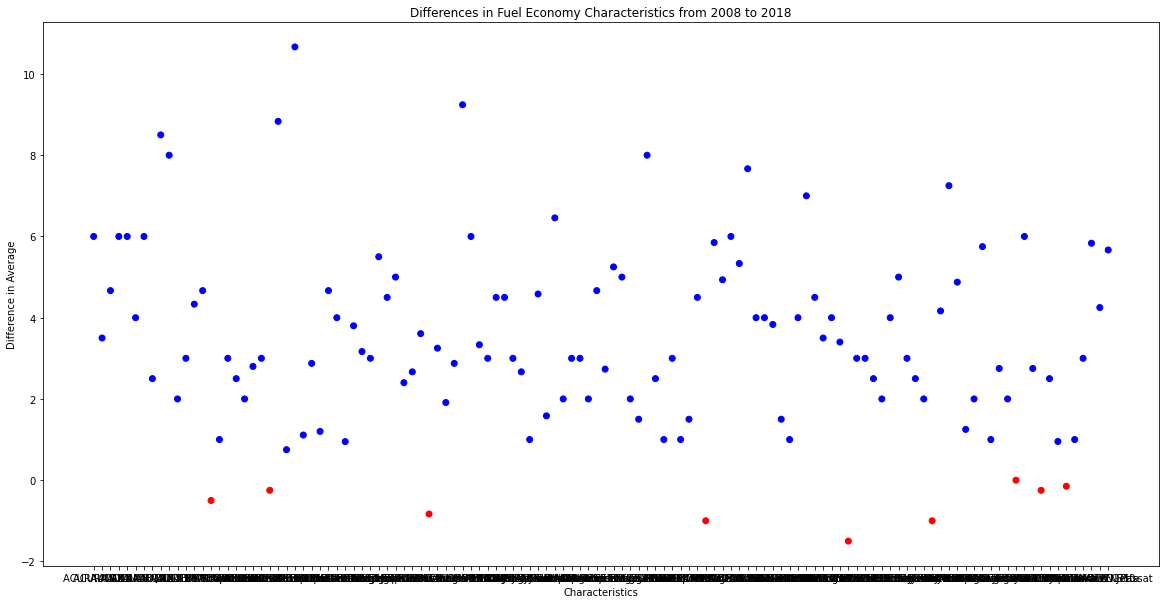

In [117]:
plt.subplots(figsize=(20, 10))
plt.scatter(diff_model.index, diff_model, color = (diff_model > 0).map({True: 'b',
                                                    False: 'r'}))
plt.title('Differences in Fuel Economy Characteristics from 2008 to 2018')
plt.xlabel('Characteristics')
plt.ylabel('Difference in Average')

In [119]:
diff_model_top = diff_model.nlargest(n=10)
diff_model_top

model
CHEVROLET Malibu       10.666667
HONDA Accord            9.242424
CHEVROLET Equinox       8.833333
AUDI S4                 8.500000
AUDI S5                 8.000000
LEXUS GS 450h           8.000000
MERCEDES-BENZ C300      7.666667
SUBARU Impreza          7.250000
NISSAN Pathfinder       7.000000
JEEP Grand Cherokee     6.457143
Name: cmb_mpg, dtype: float64

### Another way to do Q5 to to use merg

In [121]:
# Create combined dataset
# Rename 2008 columns
df_08.rename(columns=lambda x: x[:10] + '_2008', inplace=True)
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [124]:
# merge datasets
df_combined = df_08.merge(df_18, left_on = 'model_2008', right_on = 'model', how = 'inner')
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,AMS-7,4WD,Gasoline,small SUV,3.0,26.0,27.0,27.0,6,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20.0,27.0,23.0,5,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18.0,26.0,21.0,4,No
4,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-9,4WD,Gasoline,small SUV,3.0,19.0,26.0,22.0,4,No


In [125]:
# Save the combined dataset
df_combined.to_csv('combined_dataset.csv', index=False)

In [126]:
# now we need to create a new dataframe that contains the mean cmb_mpg in 2008 and 2018
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008','cmb_mpg']]
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA MDX,17.000000,23.000000
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667


In [129]:
# Create difference column
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mog_change,mpg_change
model,,,,
ACURA MDX,17.000000,23.000000,6.000000,6.000000
ACURA RDX,19.000000,22.500000,3.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667,4.666667
AUDI A4,21.000000,27.000000,6.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000,6.000000


In [134]:
model_mpg.drop(columns = 'mog_change', inplace = True)

In [135]:
#finding the vehicle that improved the most
max_change = model_mpg['mpg_change'].max()
max_change

10.666666666666668

In [136]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
CHEVROLET Malibu,22.333333,33.0,10.666667
